Importing Required libraries

In [1]:
import os
import time
import numpy as np
import pandas as pd

#Matplotlib library is required to plot the results
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

#For easier referencing import models and matrices directly
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#Importing the collected dataset from the exported csv File
url = "https://raw.githubusercontent.com/Savindu9x/ECE4810/main/Lab_03_/feed_v1.csv"
#Select only field1, field2 and class names
names = ['field1', 'field2', 'class']
#Here field1 corresonds to distance measured from the ultrasonic sensor
#Field2 corresponds to the distance substracted by previous measured distance (d_now  - d_previous = diff)
dataset = pd.read_csv(url, usecols=names)
#prints the first 20 datapoints 
print(dataset.head(20))

    field1  field2      class
0     1.35    0.81  move_away
1     2.16    0.19  move_away
2     2.35    0.64  move_away
3     2.99    0.35  move_away
4     3.34    0.50  move_away
5     3.84    0.36  move_away
6     4.20    0.92  move_away
7     5.12    0.35  move_away
8     5.47    0.89  move_away
9     6.36    0.99  move_away
10    7.35    0.52  move_away
11    7.87    0.87  move_away
12    8.74    0.38  move_away
13    9.12    0.47  move_away
14    9.59    0.07  move_away
15    9.66    0.48  move_away
16   10.14    0.69  move_away
17   10.83    0.57  move_away
18   11.40    0.73  move_away
19   12.13    0.60  move_away


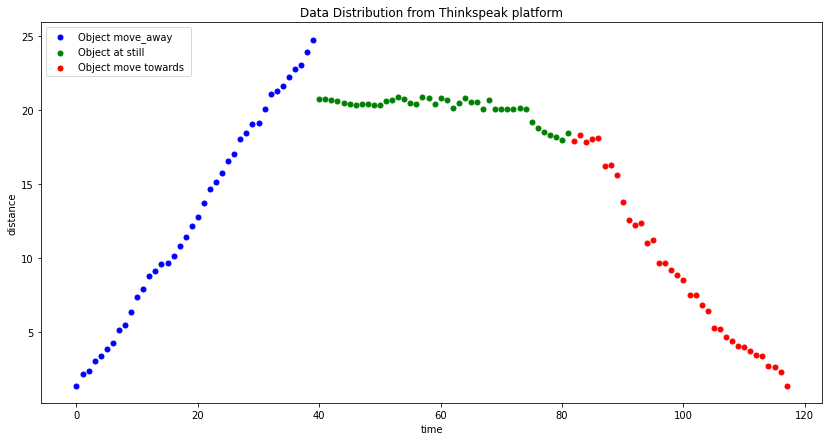

In [3]:
#Plot1
# How our dataset is made. It has 118 samples including 40 data from object is moving away, 
#42 data from object move towards and 36 from object is at still
sd = dataset.values

tt1 = sd[0:40, 0:1]
tt2 = sd[40:82, 0:1]
tt3 = sd[82:118, 0:1]
x = list(range(0, 118))
x = range(120)
y = range(25)
fig = figure(figsize  = [14, 7])
ax1 = fig.add_subplot(111)
ax1.scatter(x[0:40], tt1 , s=25, c='b', label='Object move_away')
ax1.scatter(x[40:82],tt2, s=25, c='g', label='Object at still ')
ax1.scatter(x[82:118],tt3, s=25, c='r', label='Object move towards ')
plt.legend(loc='upper left')
plt.xlabel("time")
plt.ylabel("distance")
plt.title("Data Distribution from Thinkspeak platform")
plt.show()

In [4]:
#It has 118 samples and two features.
print(dataset.shape)

(118, 3)


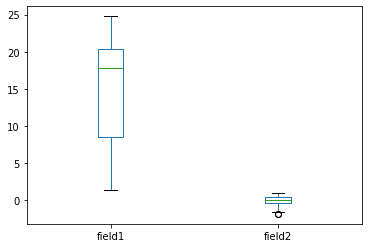

In [5]:
#plot 2
#Let's find out the average and range of exported dataset
#As you can see field2 has very small range from 1 to -1, while distance can go up to 25cm
dataset.plot(kind='box')
plt.show()

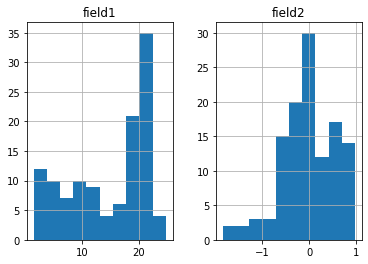

In [6]:
#plot 3
#Finding out the number of samples grouped by distance.
#This may helpful when we analyze the data in future.
dataset.hist()
plt.show()

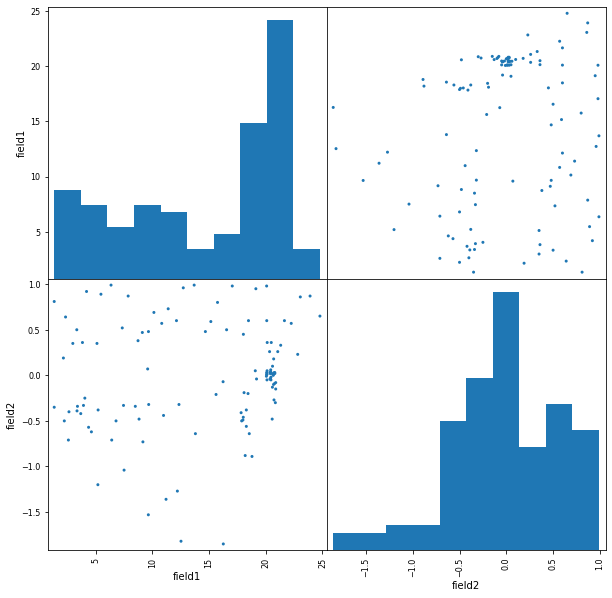

In [7]:
#plot 4
#By observing top right figure, we noticed data is accumalated around 0.5 and -0.5
scatter_matrix(dataset,figsize  = [10, 10], alpha=1)
plt.show()


In [8]:
#Identify all data in dataset.
array = dataset.values
#Selects two feature columns
X = array[:,0:2]
#Y is class label
Y = array[:, 2]

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.3, random_state=1, shuffle=True)

SVC Algorithm

Validation Accuracy: 94.44

4.249 miliseconds



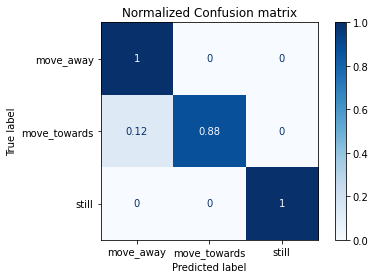

In [19]:
# Make predictions on validation dataset using SVM
model = SVC(gamma='auto')
train_start_time = time.monotonic()
classifier = model.fit(X_train, Y_train)
train_end_time = time.monotonic()
predictions = model.predict(X_validation)
disp = plot_confusion_matrix(classifier, X_validation, Y_validation, cmap=plt.cm.Blues,  normalize='true')
disp.ax_.set_title('Normalized Confusion matrix')


print('Validation Accuracy: %.2f' % (accuracy_score(Y_validation, predictions)*100))
print("")
print('%.3f miliseconds' % ((train_end_time - train_start_time)*1000))
print("")

Text(0.5, 1.0, 'Confusion matrix, without normalization')

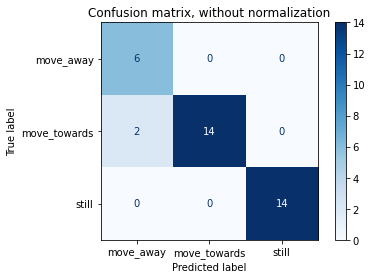

In [10]:
disp = plot_confusion_matrix(classifier, X_validation, Y_validation, cmap=plt.cm.Blues,  normalize=None)
disp.ax_.set_title('Confusion matrix, without normalization')

In [11]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

   move_away       0.75      1.00      0.86         6
move_towards       1.00      0.88      0.93        16
       still       1.00      1.00      1.00        14

    accuracy                           0.94        36
   macro avg       0.92      0.96      0.93        36
weighted avg       0.96      0.94      0.95        36



KNN Algorithm

Validation Accuracy: 83.33

1.666 miliseconds



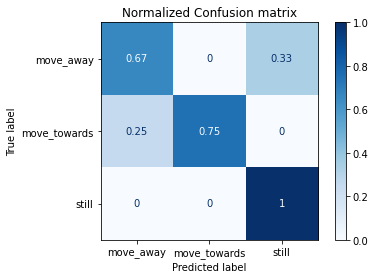

In [12]:
# Make predictions on validation dataset using KNN
model = KNeighborsClassifier()
train_start_time = time.monotonic()
classifier = model.fit(X_train, Y_train)
train_end_time = time.monotonic()
predictions = model.predict(X_validation)
disp = plot_confusion_matrix(classifier, X_validation, Y_validation, cmap=plt.cm.Blues,  normalize='true')
disp.ax_.set_title('Normalized Confusion matrix')


print('Validation Accuracy: %.2f' % (accuracy_score(Y_validation, predictions)*100))
print("")
print('%.3f miliseconds' % ((train_end_time - train_start_time)*1000))
print("")

Text(0.5, 1.0, 'Confusion matrix, without normalization')

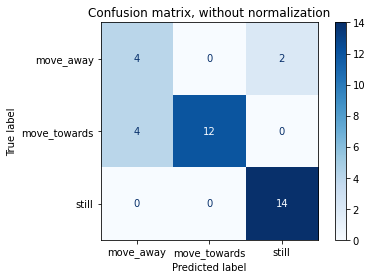

In [13]:
disp = plot_confusion_matrix(classifier, X_validation, Y_validation, cmap=plt.cm.Blues,  normalize=None)
disp.ax_.set_title('Confusion matrix, without normalization')

In [14]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

   move_away       0.50      0.67      0.57         6
move_towards       1.00      0.75      0.86        16
       still       0.88      1.00      0.93        14

    accuracy                           0.83        36
   macro avg       0.79      0.81      0.79        36
weighted avg       0.87      0.83      0.84        36



CART

Validation Accuracy: 97.22

0.906 miliseconds



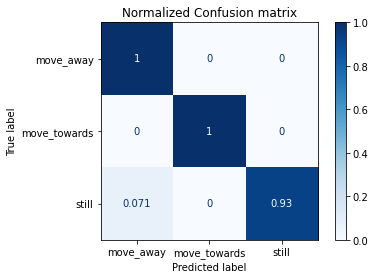

In [72]:
# Make predictions on validation dataset using CART
model = DecisionTreeClassifier()
train_start_time = time.monotonic()
classifier = model.fit(X_train, Y_train)
train_end_time = time.monotonic()
predictions = model.predict(X_validation)
disp = plot_confusion_matrix(classifier, X_validation, Y_validation, cmap=plt.cm.Blues,  normalize='true')
disp.ax_.set_title('Normalized Confusion matrix')


print('Validation Accuracy: %.2f' % (accuracy_score(Y_validation, predictions)*100))
print("")
print('%.3f miliseconds' % ((train_end_time - train_start_time)*1000))
print("")

Text(0.5, 1.0, 'Confusion matrix, without normalization')

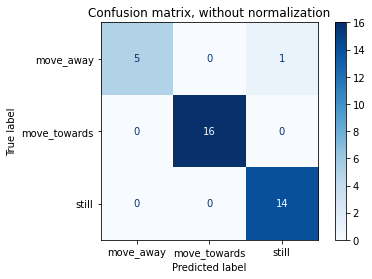

In [16]:
disp = plot_confusion_matrix(classifier, X_validation, Y_validation, cmap=plt.cm.Blues,  normalize=None)
disp.ax_.set_title('Confusion matrix, without normalization')

In [17]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

   move_away       1.00      0.83      0.91         6
move_towards       1.00      1.00      1.00        16
       still       0.93      1.00      0.97        14

    accuracy                           0.97        36
   macro avg       0.98      0.94      0.96        36
weighted avg       0.97      0.97      0.97        36



New Feature Implementation - Data Normalization

In [132]:
#Identify all data in dataset.
array = dataset.values
#Selects two feature columns
X1 = array[:,0:1]
#Y is class label
Y = array[:, 2]

#X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.3, random_state=1, shuffle=True)

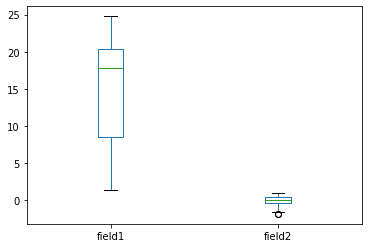

In [131]:
dataset.plot(kind='box')
plt.show()

In [ ]:
# normalization and standardization
# machine learning algorithms are sensitive to feature scaling while others are virtually invariant 
# Distance algorithms like KNN, K-means, and SVM are most affected by the range of features.
# This is because behind the scenes they are using distances between data points to determine their similarity.
# Since both the features have different scales, there is a chance that higher weightage is given to features with higher magnitude. 
# This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.

In [ ]:
# This dataset does not have gaussian distribution. Therefore, standatization is not required. 
# Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set.

In [133]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler()
X2 = array[:, 1:2]
norm = scaler.fit(X2)
X2 = norm.transform(X2)
X3 = np.concatenate((X1,X2),axis=1)

#X_validation_norm = norm.transform(X_validation)

X_train, X_validation, Y_train, Y_validation = train_test_split(X3, Y, test_size=0.3, random_state=1, shuffle=True)

Validation Accuracy: 94.44

5.744 miliseconds



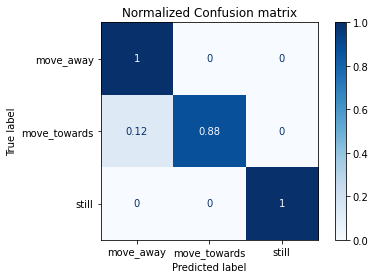

In [135]:
model = SVC(C=1,  gamma='auto')
train_start_time = time.monotonic()
classifier = model.fit(X_train, Y_train)
train_end_time = time.monotonic()
predictions = model.predict(X_validation)
disp = plot_confusion_matrix(classifier, X_validation, Y_validation, cmap=plt.cm.Blues,  normalize='true')
disp.ax_.set_title('Normalized Confusion matrix')


print('Validation Accuracy: %.2f' % (accuracy_score(Y_validation, predictions)*100))
print("")
print('%.3f miliseconds' % ((train_end_time - train_start_time)*1000))
print("")